In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
import altair as alt
import folium
from sqlalchemy import create_engine
from vega_datasets import data
from sqlite3 import connect
# con = connect('mta_data.db')
engine = create_engine('sqlite:////Users/lindango/Google Drive/Metis 2022/metis22_project_eda/mta_data.db')
con = engine.connect()


In [2]:
df = pd.read_sql('select * from mta_data', con)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,00:00:00,REGULAR,7714568,2706545
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,04:00:00,REGULAR,7714583,2706554
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,08:00:00,REGULAR,7714590,2706575
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,12:00:00,REGULAR,7714641,2706648
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,16:00:00,REGULAR,7714728,2706690


In [127]:
# Commenting the below out because we need to use SQLalchem for the project
# to pull data from sql database (DB Browser)
# df = pd.read_sql('select * from mta_data', con)
len(df["STATION"].unique())

379

In [4]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [5]:
# removing any potential leading or trailing spaces in the columns
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
# to take a look at the data i have pulled it. I have too much. 119 days, i only need 90.
df.DATE.value_counts().sort_index()

01/29/2022    30001
01/30/2022    29901
01/31/2022    30062
02/01/2022    30126
02/02/2022    29997
              ...  
05/23/2022    30438
05/24/2022    30167
05/25/2022    30147
05/26/2022    30069
05/27/2022    30151
Name: DATE, Length: 119, dtype: int64

In [7]:
# to combine the date and time columns together and also format it
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'])
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 00:00:00,REGULAR,7714568,2706545,2022-05-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 04:00:00,REGULAR,7714583,2706554,2022-05-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 08:00:00,REGULAR,7714590,2706575,2022-05-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 12:00:00,REGULAR,7714641,2706648,2022-05-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 16:00:00,REGULAR,7714728,2706690,2022-05-21 16:00:00


In [8]:
# have too much date so taking out data i dont need, starting the data from 2/27/2022 instead of 1/29/2022
threshold = datetime.datetime(2022,2,27)
df=df[df['DATE_TIME']>threshold]
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 00:00:00,REGULAR,7714568,2706545,2022-05-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 04:00:00,REGULAR,7714583,2706554,2022-05-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 08:00:00,REGULAR,7714590,2706575,2022-05-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 12:00:00,REGULAR,7714641,2706648,2022-05-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 16:00:00,REGULAR,7714728,2706690,2022-05-21 16:00:00


In [9]:

df.DATE.value_counts().sort_index()

2022-02-27    28084
2022-02-28    29934
2022-03-01    29966
2022-03-02    29974
2022-03-03    29990
              ...  
2022-05-23    30438
2022-05-24    30167
2022-05-25    30147
2022-05-26    30069
2022-05-27    30151
Name: DATE, Length: 90, dtype: int64

In [10]:
# any null values?
df.isna().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

In [11]:
# picking on station to take a look
mask = ((df["C/A"] == "A002") &
        (df["UNIT"] == "R051") & 
        (df["SCP"] == "02-00-00") & 
        (df["STATION"] == "59 ST"))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 00:00:00,REGULAR,7714568,2706545,2022-05-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 04:00:00,REGULAR,7714583,2706554,2022-05-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 08:00:00,REGULAR,7714590,2706575,2022-05-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 12:00:00,REGULAR,7714641,2706648,2022-05-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-21,2022-07-12 16:00:00,REGULAR,7714728,2706690,2022-05-21 16:00:00


In [12]:
# checking for duplicates that have the same C/A, unit, SCP, station and date time by counting the number of entry lines, showing in descending order.
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2169771,R249,R179,01-05-01,86 ST,2022-04-16 12:00:00,2
145498,A060,R001,00-00-05,WHITEHALL S-FRY,2022-05-09 05:00:00,2
2169864,R249,R179,01-05-01,86 ST,2022-05-01 20:00:00,2
2169865,R249,R179,01-05-01,86 ST,2022-05-02 00:00:00,2
2169866,R249,R179,01-05-01,86 ST,2022-05-02 04:00:00,2


In [13]:
# picking one to take a look where the duplication is
mask = ((df["C/A"] == "R249") & 
(df["UNIT"] == "R179") & 
(df["SCP"] == "01-05-01") & 
(df["STATION"] == "86 ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 4, 16).date()))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1224901,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 00:00:00,REGULAR,131072,253,2022-04-16 00:00:00
1224902,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 00:00:00,RECOVR AUD,393216,0,2022-04-16 00:00:00
1224903,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 04:00:00,REGULAR,131072,253,2022-04-16 04:00:00
1224904,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 04:00:00,RECOVR AUD,393216,0,2022-04-16 04:00:00
1224905,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 08:00:00,REGULAR,131072,253,2022-04-16 08:00:00


In [14]:
# duplication due to recovr aud
df.DESC.value_counts()

REGULAR       2695998
RECOVR AUD      11983
Name: DESC, dtype: int64

In [15]:
# sorting to drop the duplicates
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [16]:
# Checking for duplicates again
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2022-02-27 03:00:00,1
1805278,R142,R293,01-06-00,34 ST-PENN STA,2022-05-27 14:00:00,1
1805280,R142,R293,01-06-00,34 ST-PENN STA,2022-05-27 22:00:00,1
1805281,R142,R293,01-06-01,34 ST-PENN STA,2022-02-27 01:00:00,1
1805282,R142,R293,01-06-01,34 ST-PENN STA,2022-02-27 05:00:00,1


In [17]:
# dropping the exits and desc columns since we dont need it, ignoring errors on drops
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [18]:
# each row represents a turnstile (combination of the C/A, UNIT, SCP, and STATION columns). 
# The ENTRIES column represents cumulative entries approximately four hours apart.
df[(df["C/A"] == "R249") & 
(df["UNIT"] == "R179") & 
(df["SCP"] == "01-05-01") & 
(df["STATION"] == "86 ST") &
(df["DATE"] == "04/16/2022")]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1224911,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 20:00:00,131072,2022-04-16 20:00:00
1224909,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 16:00:00,131072,2022-04-16 16:00:00
1224907,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 12:00:00,131072,2022-04-16 12:00:00
1224905,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 08:00:00,131072,2022-04-16 08:00:00
1224903,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 04:00:00,131072,2022-04-16 04:00:00
1224901,R249,R179,01-05-01,86 ST,456,IRT,2022-04-16,2022-07-12 00:00:00,131072,2022-04-16 00:00:00


In [19]:
# max entries are at the end of the day, we want to take the row at the top (.first()) since this is ordered in descending order 
tsdaily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())
tsdaily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2022-02-27,7690046
1,A002,R051,02-00-00,59 ST,2022-02-28,7690377
2,A002,R051,02-00-00,59 ST,2022-03-01,7690719
3,A002,R051,02-00-00,59 ST,2022-03-02,7691071
4,A002,R051,02-00-00,59 ST,2022-03-03,7691363


In [20]:
# calculate daily entries by getting the prev dates (PD) and prev number of entries (PE) to do the calculation
tsdaily[["PD", "PE"]] = (tsdaily.groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]].apply(lambda grp: grp.shift(1)))
tsdaily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE
0,A002,R051,02-00-00,59 ST,2022-02-27,7690046,NaT,NaN
1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0
2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0
3,A002,R051,02-00-00,59 ST,2022-03-02,7691071,2022-03-01,7690719.0
4,A002,R051,02-00-00,59 ST,2022-03-03,7691363,2022-03-02,7691071.0


In [21]:
# drop the NaN lines 
tsdaily.dropna(subset=["PD"], axis=0, inplace=True)
tsdaily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE
1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0
2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0
3,A002,R051,02-00-00,59 ST,2022-03-02,7691071,2022-03-01,7690719.0
4,A002,R051,02-00-00,59 ST,2022-03-03,7691363,2022-03-02,7691071.0
5,A002,R051,02-00-00,59 ST,2022-03-04,7691692,2022-03-03,7691363.0


In [22]:
# theoretically the prev entries should be less than the entries but some arent.
tsdaily[tsdaily["ENTRIES"] < tsdaily["PE"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE
2499,A010,R080,00-00-01,57 ST-7 AV,2022-05-07,280,2022-05-06,15855093.0
2589,A010,R080,00-00-02,57 ST-7 AV,2022-05-07,157,2022-05-06,11599257.0
2679,A010,R080,00-00-03,57 ST-7 AV,2022-05-07,169,2022-05-06,3985295.0
3211,A011,R080,01-00-01,57 ST-7 AV,2022-04-29,307,2022-04-28,836725.0
3511,A011,R080,01-03-00,57 ST-7 AV,2022-02-28,885516479,2022-02-27,885516854.0


In [23]:
# Counter is counting backwards, not forwards
mask = ((df["C/A"] == "A011") & 
(df["UNIT"] == "R080") & 
(df["SCP"] == "01-03-00") & 
(df["STATION"] == "57 ST-7 AV") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 2, 27).date()))
df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
2531670,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2022-02-27,2022-07-12 23:00:00,885516854,2022-02-27 23:00:00
2531669,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2022-02-27,2022-07-12 19:00:00,885516894,2022-02-27 19:00:00
2531668,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2022-02-27,2022-07-12 15:00:00,885516991,2022-02-27 15:00:00
2531667,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2022-02-27,2022-07-12 11:00:00,885517029,2022-02-27 11:00:00
2531666,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2022-02-27,2022-07-12 07:00:00,885517041,2022-02-27 07:00:00


In [24]:
# check to see if other stations have this problem
(tsdaily[tsdaily["ENTRIES"] < tsdaily["PE"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size())

C/A   UNIT  SCP       STATION        
A010  R080  00-00-01  57 ST-7 AV          1
            00-00-02  57 ST-7 AV          1
            00-00-03  57 ST-7 AV          1
A011  R080  01-00-01  57 ST-7 AV          1
            01-03-00  57 ST-7 AV         89
                                         ..
R622  R123  00-00-00  FRANKLIN AV        88
R637  R451  00-06-00  WINTHROP ST         1
R647  R110  02-05-01  FLATBUSH AV-B.C     1
R730  R431  00-00-04  EASTCHSTER/DYRE    89
S101  R070  00-00-03  ST. GEORGE          1
Length: 218, dtype: int64

In [25]:
# MTA Assignments
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PE"]
    if counter < 0: #Counter reversed possibly
        counter = -counter
    if counter > max_counter:#counter reset to 0 if >10k
        print(row["ENTRIES"], row["PE"])
        counter = min(row["ENTRIES"], row["PE"])
    if counter > max_counter: #last check
        return 0
    return counter
tsdaily["DAILY_ENTRIES"] = tsdaily.apply(get_daily_counts, axis=1, max_counter=10000)

280 15855093.0
157 11599257.0
169 3985295.0
307 836725.0
70 317555.0
544 140377.0
233 93377.0
104 64380.0
750 16365531.0
14 9950892.0
550698591 14.0
0 317605.0
999 672037.0
162 643913.0
160 11598.0
359 209354.0
1245462 691286.0
343 4179055.0
419 501459.0
121 316354.0
177 267760.0
63 191894.0
78 212187.0
393219 2408.0
206 247237.0
2 242887.0
327680 459304.0
65536 327680.0
3849 148271.0
66 191378.0
18 3979299.0
0 262144.0
181 492445.0
164 57957.0
552542719 195953.0
2396 228335.0
83 18247982.0
130 500533.0
165 17384886.0
393228 459475.0
314 4224262.0
324 41565.0
233 10613654.0
14 5618934.0
9 493495.0
23 26291.0
185 89542.0
983123 1004056.0
1004704 983123.0
16758627 44534.0
327781 84486640.0
244 187770.0
104 214744.0
183 351102.0
6 327889.0
393216 327680.0
327680 393216.0
315 1842513.0
1043926553 2368212.0
393224 327770.0
393 8536178.0
349 176033.0
327680 720896.0
988 7582674.0
306313 134457675.0
111 353262.0
365 1605877.0
231 1115973.0
165 854687.0
931 733979.0
1227 736167.0
94 2853125.0


In [26]:
tsdaily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0,331.0
2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0,342.0
3,A002,R051,02-00-00,59 ST,2022-03-02,7691071,2022-03-01,7690719.0,352.0
4,A002,R051,02-00-00,59 ST,2022-03-03,7691363,2022-03-02,7691071.0,292.0
5,A002,R051,02-00-00,59 ST,2022-03-04,7691692,2022-03-03,7691363.0,329.0


In [27]:
# combine turnstiles that fall within the same ControlArea/Unit/Station combo
# for each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo
dailycaunitstation = tsdaily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
dailycaunitstation.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,2022-02-28,4659.0
1,A002,R051,59 ST,2022-03-01,4971.0
2,A002,R051,59 ST,2022-03-02,5060.0
3,A002,R051,59 ST,2022-03-03,5025.0
4,A002,R051,59 ST,2022-03-04,4795.0


In [128]:
# daily time series for each STATION, add up all the turnstiles in a station
dailystation = tsdaily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
dailystation['DAY_OF_WEEK_NUM'] = pd.to_datetime(dailystation['DATE']).dt.dayofweek
dailystation['WEEK_OF_YEAR'] = pd.to_datetime(dailystation['DATE']).dt.week
dailystation.head()

/var/folders/m1/v2j43b5d53z1kfmlzwrgtj0h0000gn/T/ipykernel_85722/1620280516.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dailystation['WEEK_OF_YEAR'] = pd.to_datetime(dailystation['DATE']).dt.week


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
0,1 AV,2022-02-28,8244.0,0,9
1,1 AV,2022-03-01,9017.0,1,9
2,1 AV,2022-03-02,9166.0,2,9
3,1 AV,2022-03-03,8988.0,3,9
4,1 AV,2022-03-04,8846.0,4,9


In [29]:
# sum total ridership for each station and sort them
totstation = dailystation.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
totstation.head(20)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,4527727.0
1,GRD CNTRL-42 ST,3551545.0
2,34 ST-HERALD SQ,3364935.0
3,23 ST,3172045.0
4,42 ST-PORT AUTH,3150189.0
5,86 ST,3022362.0
6,14 ST-UNION SQ,2787101.0
7,TIMES SQ-42 ST,2759912.0
8,125 ST,2709535.0
9,FULTON ST,2625426.0


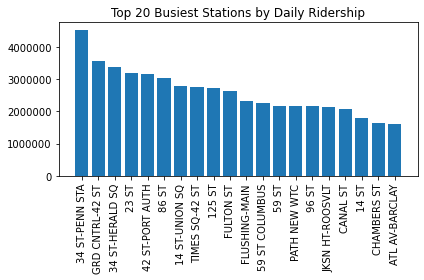

In [30]:
# Bar chart to show the stations with the most ridership (Penn ST, Grand Central and 34th and Herald have highest)
plt.ticklabel_format(style = 'plain')
fig1=plt.bar(x=totstation['STATION'][:20], height=totstation['DAILY_ENTRIES'][:20])
plt.title('Top 20 Busiest Stations by Daily Ridership', color='black')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("top_stations.jpg", dpi=1200)

In [31]:
source = totstation.sort_values('DAILY_ENTRIES',ascending = False).head(20)
alt.Chart(source, title="Top 20 Busiest Stations").mark_bar().encode(
    x=alt.X('STATION:O', title='Station Name',sort='-y'),
    y=alt.Y('DAILY_ENTRIES:Q', title='Total Entries'),
    color=alt.condition(
        alt.datum.STATION == '34 ST-PENN STA',
        alt.value('olivedrab'), 
        alt.value('indigo') 
    )
).properties(width=600)

alt.Chart(...)

In [32]:
tsdaily.DATE.value_counts().sort_index()

2022-02-28    5001
2022-03-01    5008
2022-03-02    5012
2022-03-03    5011
2022-03-04    5013
              ... 
2022-05-23    5035
2022-05-24    5036
2022-05-25    5035
2022-05-26    5034
2022-05-27    5033
Name: DATE, Length: 89, dtype: int64

In [33]:
tsdaily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0,331.0
2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0,342.0
3,A002,R051,02-00-00,59 ST,2022-03-02,7691071,2022-03-01,7690719.0,352.0
4,A002,R051,02-00-00,59 ST,2022-03-03,7691363,2022-03-02,7691071.0,292.0
5,A002,R051,02-00-00,59 ST,2022-03-04,7691692,2022-03-03,7691363.0,329.0


In [34]:
tsdaily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447145 entries, 1 to 452193
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   C/A            447145 non-null  object        
 1   UNIT           447145 non-null  object        
 2   SCP            447145 non-null  object        
 3   STATION        447145 non-null  object        
 4   DATE           447145 non-null  datetime64[ns]
 5   ENTRIES        447145 non-null  int64         
 6   PD             447145 non-null  datetime64[ns]
 7   PE             447145 non-null  float64       
 8   DAILY_ENTRIES  447145 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 34.1+ MB


In [35]:
tsdaily['month'] = tsdaily['DATE'].dt.month
tsdaily['day'] = tsdaily['DATE'].dt.day
tsdaily['year'] = tsdaily['DATE'].dt.year
cols=["year","month","day"]
tsdaily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE,DAILY_ENTRIES,month,day,year
1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0,331.0,2,28,2022
2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0,342.0,3,1,2022
3,A002,R051,02-00-00,59 ST,2022-03-02,7691071,2022-03-01,7690719.0,352.0,3,2,2022
4,A002,R051,02-00-00,59 ST,2022-03-03,7691363,2022-03-02,7691071.0,292.0,3,3,2022
5,A002,R051,02-00-00,59 ST,2022-03-04,7691692,2022-03-03,7691363.0,329.0,3,4,2022


In [38]:
# Ridership by month.....something odd going on with February? Because i pulled the data starting on the 27th
df_entries = tsdaily.groupby('month')['DAILY_ENTRIES'].sum()
df_entries

month
2     2311186.0
3    67163663.0
4    62996781.0
5    59230773.0
Name: DAILY_ENTRIES, dtype: float64

In [40]:
tsdaily.head(2)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE,DAILY_ENTRIES,month,day,year
1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0,331.0,2,28,2022
2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0,342.0,3,1,2022


In [41]:
tsdaily.reset_index(inplace=True)
tsdaily.head(2)

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE,DAILY_ENTRIES,month,day,year
0,1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0,331.0,2,28,2022
1,2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0,342.0,3,1,2022


In [42]:

tsdaily['DOTW'] = pd.to_datetime(tsdaily['DATE']).dt.dayofweek
tsdaily['WEEK_OF_YEAR'] = pd.to_datetime(tsdaily['DATE']).dt.isocalendar().week 
tsdaily.head()

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE,DAILY_ENTRIES,month,day,year,DOTW,WEEK_OF_YEAR
0,1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0,331.0,2,28,2022,0,9
1,2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0,342.0,3,1,2022,1,9
2,3,A002,R051,02-00-00,59 ST,2022-03-02,7691071,2022-03-01,7690719.0,352.0,3,2,2022,2,9
3,4,A002,R051,02-00-00,59 ST,2022-03-03,7691363,2022-03-02,7691071.0,292.0,3,3,2022,3,9
4,5,A002,R051,02-00-00,59 ST,2022-03-04,7691692,2022-03-03,7691363.0,329.0,3,4,2022,4,9


In [44]:
tsdaily.head(3)

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PD,PE,DAILY_ENTRIES,month,day,year,DOTW,WEEK_OF_YEAR
0,1,A002,R051,02-00-00,59 ST,2022-02-28,7690377,2022-02-27,7690046.0,331.0,2,28,2022,0,9
1,2,A002,R051,02-00-00,59 ST,2022-03-01,7690719,2022-02-28,7690377.0,342.0,3,1,2022,1,9
2,3,A002,R051,02-00-00,59 ST,2022-03-02,7691071,2022-03-01,7690719.0,352.0,3,2,2022,2,9


In [45]:
# about 3-4million riders per weekday, much less rider on the weekends which is makes sense
dotw_entries = tsdaily.groupby('DOTW')['DAILY_ENTRIES'].sum()
dotw_entries

DOTW
0    30105079.0
1    32720029.0
2    33149756.0
3    33024618.0
4    31277725.0
5    17453268.0
6    13971928.0
Name: DAILY_ENTRIES, dtype: float64

In [46]:
indexes = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
dotw_entries.index = indexes
dotw_entries

Monday       30105079.0
Tuesday      32720029.0
Wednesday    33149756.0
Thursday     33024618.0
Friday       31277725.0
Saturday     17453268.0
Sunday       13971928.0
Name: DAILY_ENTRIES, dtype: float64

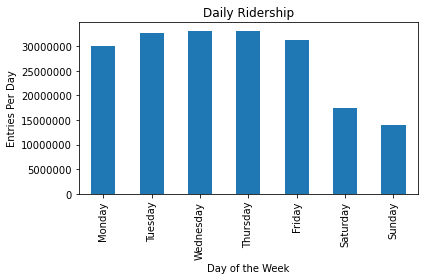

In [47]:
# Weekdays have the most ridership, weekends are roughly half
plt.ticklabel_format(style = 'plain')
dotw_entries.plot(kind='bar')
plt.title('Daily Ridership', color='black')
plt.xticks(rotation=90)
plt.xlabel("Day of the Week")
plt.ylabel("Entries Per Day")
plt.tight_layout()
plt.savefig("DOTW Ridership.jpg", dpi=1200)

In [48]:
df.to_csv('cleaned_mta_data.csv')

In [113]:
mask = ((df["STATION"] == "GRD CNTRL-42 ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 2, 27).date()))
df[mask].tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
2690107,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,2022-02-27,2022-07-12 20:00:00,309,2022-02-27 20:00:00
2690106,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,2022-02-27,2022-07-12 16:00:00,309,2022-02-27 16:00:00
2690105,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,2022-02-27,2022-07-12 12:00:00,309,2022-02-27 12:00:00
2690104,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,2022-02-27,2022-07-12 08:00:00,309,2022-02-27 08:00:00
2690103,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,2022-02-27,2022-07-12 04:00:00,309,2022-02-27 04:00:00


In [115]:
GRDCNTRL = dailystation[(dailystation["STATION"] == "GRD CNTRL-42 ST")]
GRDCNTRL.head()

,STATION,DATE,DAILY_ENTRIES
20731,GRD CNTRL-42 ST,2022-02-28,40376.0
20732,GRD CNTRL-42 ST,2022-03-01,45927.0
20733,GRD CNTRL-42 ST,2022-03-02,46407.0
20734,GRD CNTRL-42 ST,2022-03-03,46226.0
20735,GRD CNTRL-42 ST,2022-03-04,40597.0


(array([19052., 19066., 19083., 19097., 19113., 19127.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

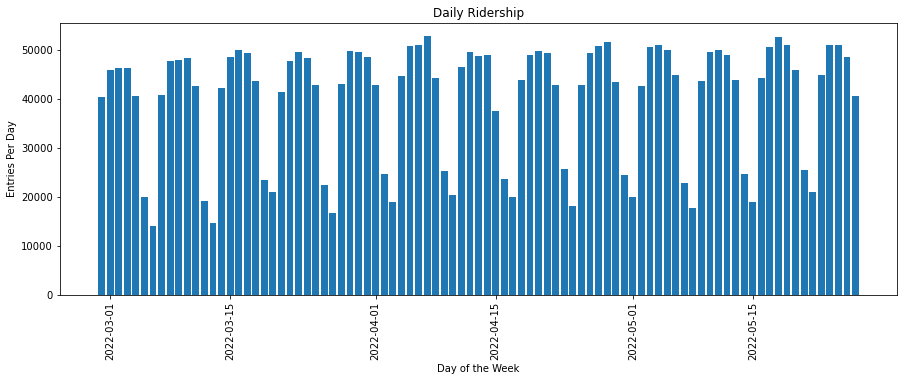

In [116]:
# something unusual with 3/9/2022 date. Need to look into it. Ridership way too high.
plt.figure(figsize=(15,5))
plt.title('Daily Ridership for Grand Central Station', color='black')
plt.xticks(rotation=90)
plt.xlabel("Day of the Week")
plt.ylabel("Entries Per Day")
fig2=plt.bar(x=GRDCNTRL['DATE'][:90], height=GRDCNTRL['DAILY_ENTRIES'][:90])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Daily Entries for Grand Central Station')

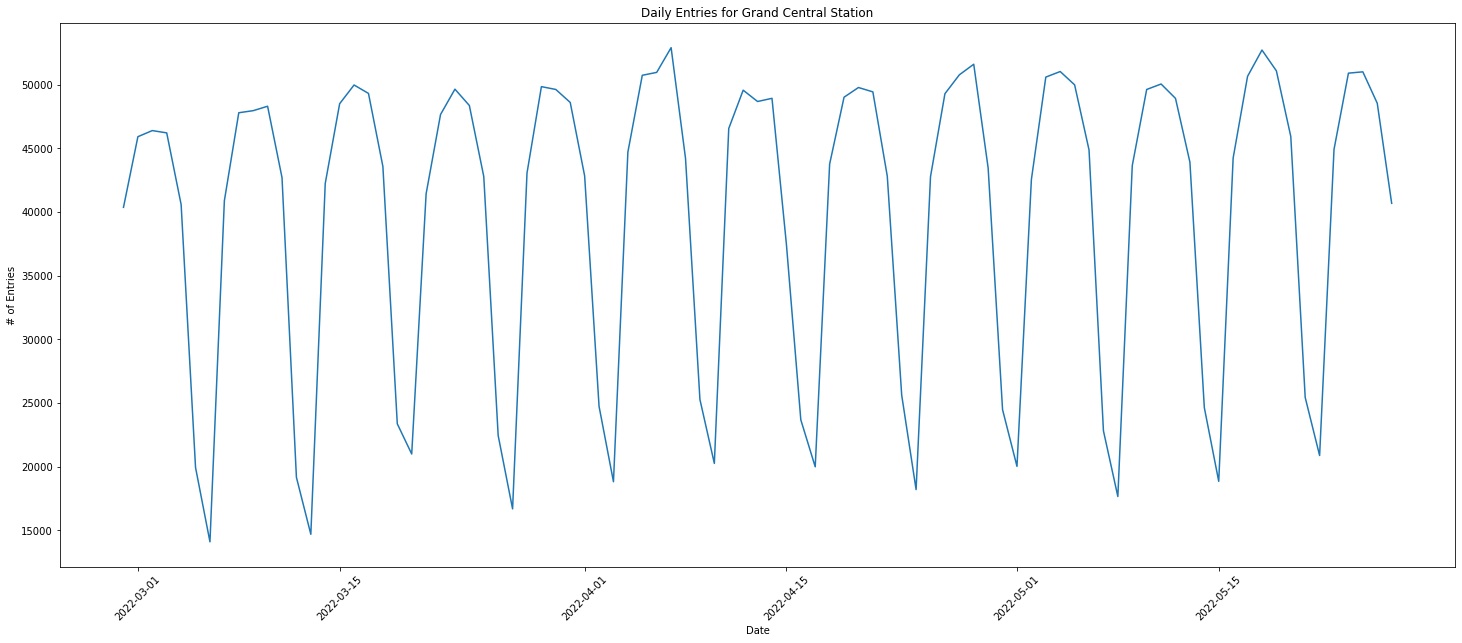

In [130]:
plt.figure(figsize=(25,10))
plt.plot(GRDCNTRL['DATE'], GRDCNTRL['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Grand Central Station')

In [53]:
PENN34 = dailystation[(dailystation["STATION"] == "34 ST-PENN STA")]
PENN34.head()

,STATION,DATE,DAILY_ENTRIES
5429,34 ST-PENN STA,2022-02-28,53013.0
5430,34 ST-PENN STA,2022-03-01,57138.0
5431,34 ST-PENN STA,2022-03-02,58567.0
5432,34 ST-PENN STA,2022-03-03,57717.0
5433,34 ST-PENN STA,2022-03-04,52241.0


(array([19052., 19066., 19083., 19097., 19113., 19127.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

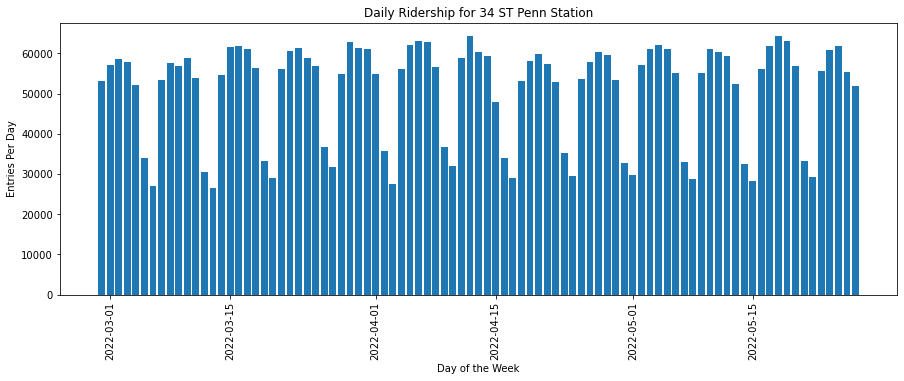

In [112]:
# ridership looks reasonable, lower ridership for weekends.
plt.figure(figsize=(15,5))
plt.title('Daily Ridership for 34 ST Penn Station', color='black')
plt.xticks(rotation=90)
plt.xlabel("Day of the Week")
plt.ylabel("Entries Per Day")
fig3=plt.bar(x=PENN34['DATE'][:90], height=PENN34['DAILY_ENTRIES'][:90])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Daily Entries for 34 ST and Penn Station')

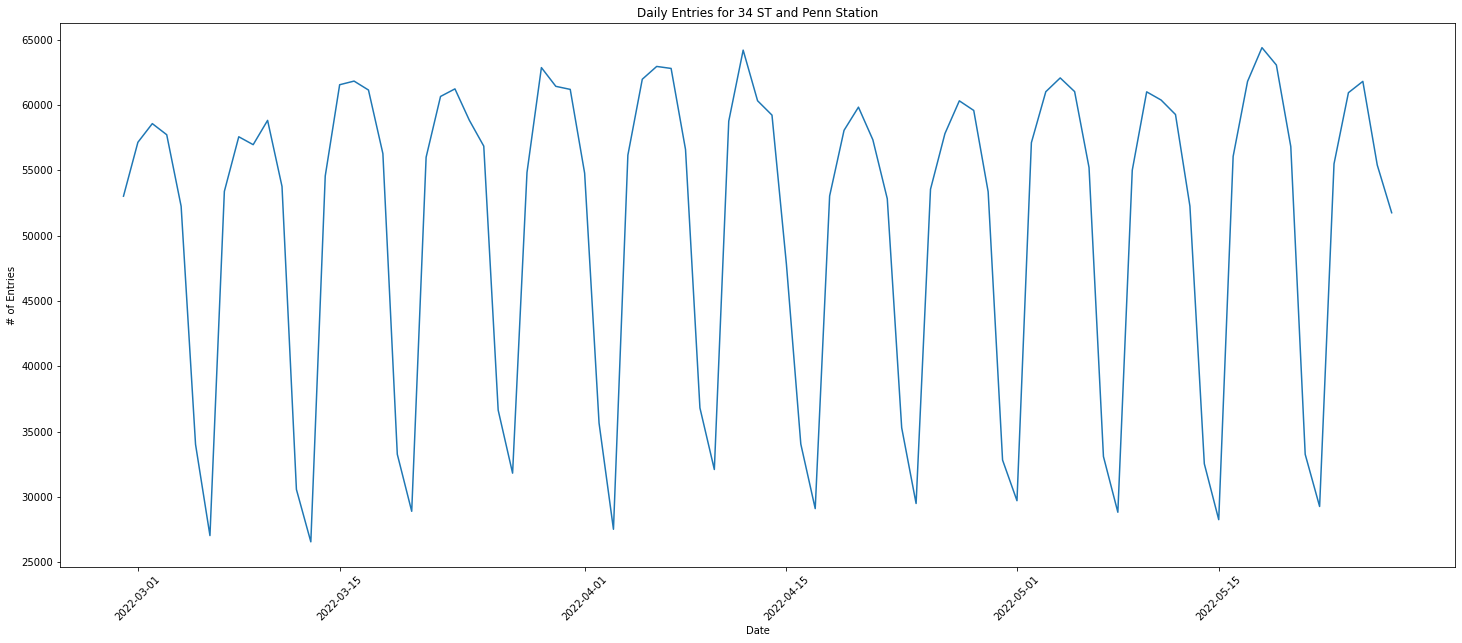

In [55]:
plt.figure(figsize=(25,10))
plt.plot(PENN34['DATE'], PENN34['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 34 ST and Penn Station')

In [56]:
ST86 = dailystation[(dailystation["STATION"] == "86 ST")]
ST86.head()

,STATION,DATE,DAILY_ENTRIES
9790,86 ST,2022-02-28,38462.0
9791,86 ST,2022-03-01,41000.0
9792,86 ST,2022-03-02,40857.0
9793,86 ST,2022-03-03,41131.0
9794,86 ST,2022-03-04,40425.0


Text(0.5, 1.0, 'Daily Entries for 86 ST')

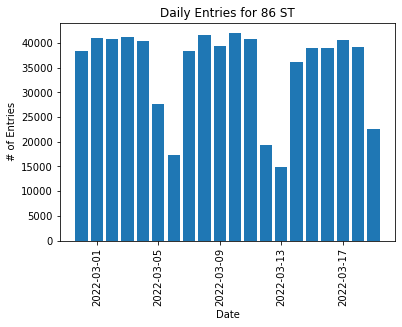

In [57]:
# # ridership looks reasonable, lower ridership for weekends.
fig34=plt.bar(x=ST86['DATE'][:20], height=ST86['DAILY_ENTRIES'][:20])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for 86 ST')

Text(0.5, 1.0, 'Daily Entries')

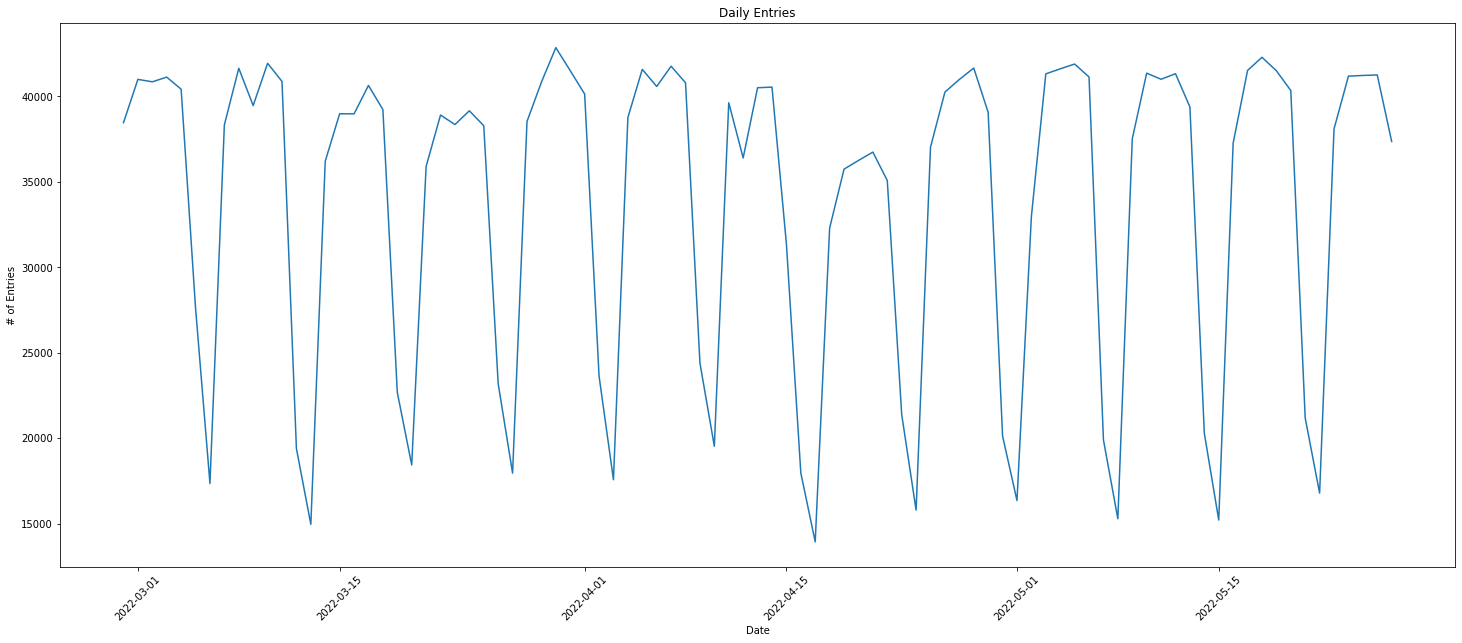

In [58]:
plt.figure(figsize=(25,10))
plt.plot(ST86['DATE'], ST86['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries')

In [59]:
ST86['DAY_OF_WEEK_NUM'] = pd.to_datetime(ST86['DATE']).dt.dayofweek
ST86['WEEK_OF_YEAR'] = pd.to_datetime(ST86['DATE']).dt.week
ST86.head()

/var/folders/m1/v2j43b5d53z1kfmlzwrgtj0h0000gn/T/ipykernel_85722/230461359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ST86['DAY_OF_WEEK_NUM'] = pd.to_datetime(ST86['DATE']).dt.dayofweek
/var/folders/m1/v2j43b5d53z1kfmlzwrgtj0h0000gn/T/ipykernel_85722/230461359.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ST86['WEEK_OF_YEAR'] = pd.to_datetime(ST86['DATE']).dt.week
/var/folders/m1/v2j43b5d53z1kfmlzwrgtj0h0000gn/T/ipykernel_85722/230461359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
9790,86 ST,2022-02-28,38462.0,0,9
9791,86 ST,2022-03-01,41000.0,1,9
9792,86 ST,2022-03-02,40857.0,2,9
9793,86 ST,2022-03-03,41131.0,3,9
9794,86 ST,2022-03-04,40425.0,4,9


Text(0.5, 1.0, 'Ridership per day for 86 ST')

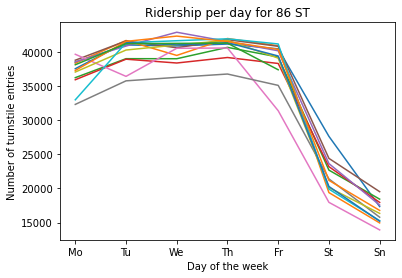

In [60]:
for i, group in ST86.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 86 ST')

In [62]:
stationscoords = pd.read_csv('fixed_coords.csv')
stationscoords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  344 non-null    int64  
 1   NAME        343 non-null    object 
 2   lat         344 non-null    float64
 3   lon         344 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.9+ KB


In [65]:
stationscoords.isna().sum()


Unnamed: 0    0
NAME          1
lat           0
lon           0
dtype: int64

In [66]:
stationscoords.dropna(subset=["NAME"], axis=0, inplace=True)

In [67]:
stationscoords.isna().sum()

Unnamed: 0    0
NAME          0
lat           0
lon           0
dtype: int64

In [73]:
tsmerged = pd.merge(
  totstation, 
  stationscoords, 
  left_on=['STATION'], 
  right_on=['NAME']
)
tsmerged.head()

,STATION,DAILY_ENTRIES,Unnamed: 0,NAME,lat,lon
0,34 ST-PENN STA,4527727.0,357,34 ST-PENN STA,-73.991057,40.750373
1,GRD CNTRL-42 ST,3551545.0,30,GRD CNTRL-42 ST,-73.976713,40.751807
2,34 ST-HERALD SQ,3364935.0,144,34 ST-HERALD SQ,-73.987937,40.749645
3,23 ST,3172045.0,91,23 ST,-73.986599,40.739864
4,42 ST-PORT AUTH,3150189.0,361,42 ST-PORT AUTH,-73.989735,40.757308


In [74]:
station1 = tsmerged.drop_duplicates(subset=["NAME"], keep="first")
station1.columns

Index(['STATION', 'DAILY_ENTRIES', 'Unnamed: 0', 'NAME', 'lat', 'lon'], dtype='object')

In [76]:
station1.sort_values('DAILY_ENTRIES',ascending = False).head(5)


,STATION,DAILY_ENTRIES,Unnamed: 0,NAME,lat,lon
0,34 ST-PENN STA,4527727.0,357,34 ST-PENN STA,-73.991057,40.750373
1,GRD CNTRL-42 ST,3551545.0,30,GRD CNTRL-42 ST,-73.976713,40.751807
2,34 ST-HERALD SQ,3364935.0,144,34 ST-HERALD SQ,-73.987937,40.749645
3,23 ST,3172045.0,91,23 ST,-73.986599,40.739864
4,42 ST-PORT AUTH,3150189.0,361,42 ST-PORT AUTH,-73.989735,40.757308


In [124]:
source = station1.sort_values('DAILY_ENTRIES',ascending = False).head(10)

alt.Chart(source,title='Top 10 Total Entries').mark_square(size=100).encode(
    x='NAME',
    y='DAILY_ENTRIES',
    color='STATION',
    size='DAILY_ENTRIES'
    
).interactive()

alt.Chart(...)

In [103]:
from folium.features import DivIcon
station_map = folium.Map(location=[station1['lat'].mean(), station1['lon'].mean()], zoom_start=11, control_scale=True)
for index, location_info in station1.iterrows():
    folium.Marker([location_info['lat'], location_info['lon']], popup=location_info["DAILY_ENTRIES"]).add_to(station_map)
station_map    

In [89]:
nypdarrests = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
nypdarrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76831 entries, 0 to 76830
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                76831 non-null  int64  
 1   ARREST_DATE               76831 non-null  object 
 2   PD_CD                     76819 non-null  float64
 3   PD_DESC                   76831 non-null  object 
 4   KY_CD                     76755 non-null  float64
 5   OFNS_DESC                 76831 non-null  object 
 6   LAW_CODE                  76831 non-null  object 
 7   LAW_CAT_CD                76120 non-null  object 
 8   ARREST_BORO               76831 non-null  object 
 9   ARREST_PRECINCT           76831 non-null  int64  
 10  JURISDICTION_CODE         76831 non-null  int64  
 11  AGE_GROUP                 76831 non-null  object 
 12  PERP_SEX                  76831 non-null  object 
 13  PERP_RACE                 76831 non-null  object 
 14  X_COOR

In [90]:
nypdarrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,240143213,02/04/2022,578.0,(null),NaN,(null),PL 2223001,M,Q,107,0,25-44,M,BLACK,1035531,205745,40.731252,-73.814969,POINT (-73.814969 40.731252)
1,241527342,03/03/2022,578.0,(null),NaN,(null),PL 2223001,M,M,23,0,25-44,M,BLACK,998751,226901,40.789463,-73.947634,POINT (-73.9476340039424 40.7894632995555)
2,238849340,01/08/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,79,0,45-64,M,BLACK,999496,190300,40.689001,-73.945027,POINT (-73.9450265328727 40.68900139556)
3,239051628,01/12/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,13,0,45-64,M,WHITE,988971,207813,40.737074,-73.982962,POINT (-73.982962 40.737074)
4,243724341,04/15/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,67,0,45-64,M,BLACK,997843,175671,40.648851,-73.951017,POINT (-73.951016510623 40.6488507469884)


In [131]:
df_crime = nypdarrests[['ARREST_KEY',
                        'ARREST_DATE',
                            'OFNS_DESC',
                            'ARREST_BORO',
                            'ARREST_PRECINCT',
                            'Latitude',
                            'Longitude',
                            'JURISDICTION_CODE',
                            'PD_DESC']]
df_crime.head()

,ARREST_KEY,ARREST_DATE,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,Latitude,Longitude,JURISDICTION_CODE,PD_DESC
0,240143213,02/04/2022,(null),Q,107,40.731252,-73.814969,0,(null)
1,241527342,03/03/2022,(null),M,23,40.789463,-73.947634,0,(null)
2,238849340,01/08/2022,RAPE,K,79,40.689001,-73.945027,0,RAPE 1
3,239051628,01/12/2022,ASSAULT 3 & RELATED OFFENSES,M,13,40.737074,-73.982962,0,ASSAULT 3
4,243724341,04/15/2022,RAPE,K,67,40.648851,-73.951017,0,RAPE 1


In [141]:
df_crime.groupby('PD_DESC').count()

,ARREST_KEY,ARREST_DATE,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,Latitude,Longitude,JURISDICTION_CODE
PD_DESC,,,,,,,,
(null),76,76,76,76,76,76,76,76
"ACCOSTING,FRAUDULENT",8,8,8,8,8,8,8,8
"ADM.CODE,UNCLASSIFIED MISDEMEA",10,10,10,10,10,10,10,10
"ADM.CODE,UNCLASSIFIED VIOLATIO",10,10,10,10,10,10,10,10
AGGRAVATED CRIMINAL CONTEMPT,96,96,96,96,96,96,96,96
...,...,...,...,...,...,...,...,...
VEHICULAR ASSAULT (INTOX DRIVE,20,20,20,20,20,20,20,20
WEAPONS POSSESSION 1 & 2,1972,1972,1972,1972,1972,1972,1972,1972
WEAPONS POSSESSION 3,492,492,492,492,492,492,492,492


In [109]:
from folium.features import DivIcon
station_map = folium.Map(location=[df_crime['Latitude'].mean(), df_crime['Longitude'].mean()], zoom_start=11, control_scale=True)
for index, location_info in df_crime.iterrows():
    folium.Marker([location_info['Latitude'], location_info['Longitude']], popup=location_info["PD_DESC"]).add_to(station_map)
station_map    